In [67]:
import pandas as pd

In [68]:
from datetime import datetime as dt
dt.now()
type(dt.now())

datetime.datetime

In [69]:
address = "D:/AA/Programming/Data Science/Maven-Analytics/Python/Data Analysis With Python AND Pandas/Pandas+Course+Resources/Pandas Course Resources/retail/transactions.csv"
transaction = pd.read_csv(address)
transaction.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [70]:
transaction.info(show_counts = 1 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [71]:
transaction[transaction.isna().any(axis = 1)]

,date,store_nbr,transactions


In [72]:
transaction.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [73]:
transaction.transactions = pd.to_datetime(transaction.transactions , infer_datetime_format = True)
transaction = transaction.assign(date1 = transaction.transactions.dt.strftime("%D") , 
                  Year = transaction.transactions.dt.strftime("%Y") , 
                  Month = transaction.transactions.dt.strftime("%B") , 
                  Month_Number = transaction.transactions.dt.strftime("%m") , 
                  )
transaction
#transaction.info(show_counts = "all" , memory_usage = "deep")

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17540\1333784451.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  transaction.transactions = pd.to_datetime(transaction.transactions , infer_datetime_format = True)


,date,store_nbr,transactions,date1,Year,Month,Month_Number
0,2013-01-01,25,1970-01-01 00:00:00.000000770,01/01/70,1970,January,01
1,2013-01-02,1,1970-01-01 00:00:00.000002111,01/01/70,1970,January,01
2,2013-01-02,2,1970-01-01 00:00:00.000002358,01/01/70,1970,January,01
3,2013-01-02,3,1970-01-01 00:00:00.000003487,01/01/70,1970,January,01
4,2013-01-02,4,1970-01-01 00:00:00.000001922,01/01/70,1970,January,01
...,...,...,...,...,...,...,...
83483,2017-08-15,50,1970-01-01 00:00:00.000002804,01/01/70,1970,January,01
83484,2017-08-15,51,1970-01-01 00:00:00.000001573,01/01/70,1970,January,01
83485,2017-08-15,52,1970-01-01 00:00:00.000002255,01/01/70,1970,January,01
83486,2017-08-15,53,1970-01-01 00:00:00.000000932,01/01/70,1970,January,01


In [74]:
transaction.loc[transaction.Month == "March"]

,date,store_nbr,transactions,date1,Year,Month,Month_Number


In [75]:
transaction.set_index("date").dtypes

store_nbr                int64
transactions    datetime64[ns]
date1                   object
Year                    object
Month                   object
Month_Number            object
dtype: object

In [76]:
transaction = transaction.astype({"date" : "datetime64[ns]"} , errors = "ignore")
transaction

,date,store_nbr,transactions,date1,Year,Month,Month_Number
0,2013-01-01,25,1970-01-01 00:00:00.000000770,01/01/70,1970,January,01
1,2013-01-02,1,1970-01-01 00:00:00.000002111,01/01/70,1970,January,01
2,2013-01-02,2,1970-01-01 00:00:00.000002358,01/01/70,1970,January,01
3,2013-01-02,3,1970-01-01 00:00:00.000003487,01/01/70,1970,January,01
4,2013-01-02,4,1970-01-01 00:00:00.000001922,01/01/70,1970,January,01
...,...,...,...,...,...,...,...
83483,2017-08-15,50,1970-01-01 00:00:00.000002804,01/01/70,1970,January,01
83484,2017-08-15,51,1970-01-01 00:00:00.000001573,01/01/70,1970,January,01
83485,2017-08-15,52,1970-01-01 00:00:00.000002255,01/01/70,1970,January,01
83486,2017-08-15,53,1970-01-01 00:00:00.000000932,01/01/70,1970,January,01


In [77]:
transaction.date.dt.strftime("%Y-%B-%d")

0        2013-January-01
1        2013-January-02
2        2013-January-02
3        2013-January-02
4        2013-January-02
              ...       
83483     2017-August-15
83484     2017-August-15
83485     2017-August-15
83486     2017-August-15
83487     2017-August-15
Name: date, Length: 83488, dtype: object

In [78]:
transaction = transaction.assign(
    Year = transaction.date.dt.strftime("%Y") , 
    Month = transaction.date.dt.strftime("%m") , 
    Date_of_Month = transaction.date.dt.strftime("%d") , 
    Day_of_Year = transaction.date.dt.strftime("%j")
)
transaction

,date,store_nbr,transactions,date1,Year,Month,Month_Number,Date_of_Month,Day_of_Year
0,2013-01-01,25,1970-01-01 00:00:00.000000770,01/01/70,2013,01,01,01,001
1,2013-01-02,1,1970-01-01 00:00:00.000002111,01/01/70,2013,01,01,02,002
2,2013-01-02,2,1970-01-01 00:00:00.000002358,01/01/70,2013,01,01,02,002
3,2013-01-02,3,1970-01-01 00:00:00.000003487,01/01/70,2013,01,01,02,002
4,2013-01-02,4,1970-01-01 00:00:00.000001922,01/01/70,2013,01,01,02,002
...,...,...,...,...,...,...,...,...,...
83483,2017-08-15,50,1970-01-01 00:00:00.000002804,01/01/70,2017,08,01,15,227
83484,2017-08-15,51,1970-01-01 00:00:00.000001573,01/01/70,2017,08,01,15,227
83485,2017-08-15,52,1970-01-01 00:00:00.000002255,01/01/70,2017,08,01,15,227
83486,2017-08-15,53,1970-01-01 00:00:00.000000932,01/01/70,2017,08,01,15,227


In [79]:
transaction.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           83488 non-null  datetime64[ns]
 1   store_nbr      83488 non-null  int64         
 2   transactions   83488 non-null  datetime64[ns]
 3   date1          83488 non-null  object        
 4   Year           83488 non-null  object        
 5   Month          83488 non-null  object        
 6   Month_Number   83488 non-null  object        
 7   Date_of_Month  83488 non-null  object        
 8   Day_of_Year    83488 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 5.7+ MB


In [80]:
transaction2 = pd.read_csv(address)
transaction2.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [81]:
transaction2["date"] = pd.to_datetime(transaction2["date"] , errors = "coerce" , 
                                     infer_datetime_format = True 
                                     )
transaction2.head()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17540\2976864579.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  transaction2["date"] = pd.to_datetime(transaction2["date"] , errors = "coerce" ,


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [82]:
transaction2.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [83]:
transaction2["date"] = pd.to_datetime(transaction2["date"] , errors = "coerce" , 
                                     infer_datetime_format = True , 
                                      format = "%Y - %m - %d"
                                     )
transaction2.head()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17540\2892886120.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  transaction2["date"] = pd.to_datetime(transaction2["date"] , errors = "coerce" ,


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [84]:
now = dt.now()

In [85]:
now.strftime("%D")

'05/05/24'

In [86]:
now.strftime("%Y")

'2024'

In [87]:
now.strftime("%B %d, %Y")

'May 05, 2024'

# Assignment 1: Date Formats and Date Parts

* First, convert the `date` column to datetime64, by any method.

* Then, create a column representing the time difference between the last date in the data and each date. 

* Next, create columns for the date parts year, month, and weekday.

* Finally, format the date to Year-Month-Day (This will be a string/object).

In [88]:
# read in transactions.csv 
transaction["date"] = pd.to_datetime(transaction["date"] , 
                                     errors = "coerce",
                                     infer_datetime_format= True
)

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17540\722504049.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  transaction["date"] = pd.to_datetime(transaction["date"] ,


In [89]:
transaction.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           83488 non-null  datetime64[ns]
 1   store_nbr      83488 non-null  int64         
 2   transactions   83488 non-null  datetime64[ns]
 3   date1          83488 non-null  object        
 4   Year           83488 non-null  object        
 5   Month          83488 non-null  object        
 6   Month_Number   83488 non-null  object        
 7   Date_of_Month  83488 non-null  object        
 8   Day_of_Year    83488 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 5.7+ MB


In [90]:
transaction.head(10)

,date,store_nbr,transactions,date1,Year,Month,Month_Number,Date_of_Month,Day_of_Year
0,2013-01-01,25,1970-01-01 00:00:00.000000770,01/01/70,2013,01,01,01,001
1,2013-01-02,1,1970-01-01 00:00:00.000002111,01/01/70,2013,01,01,02,002
2,2013-01-02,2,1970-01-01 00:00:00.000002358,01/01/70,2013,01,01,02,002
3,2013-01-02,3,1970-01-01 00:00:00.000003487,01/01/70,2013,01,01,02,002
4,2013-01-02,4,1970-01-01 00:00:00.000001922,01/01/70,2013,01,01,02,002
5,2013-01-02,5,1970-01-01 00:00:00.000001903,01/01/70,2013,01,01,02,002
6,2013-01-02,6,1970-01-01 00:00:00.000002143,01/01/70,2013,01,01,02,002
7,2013-01-02,7,1970-01-01 00:00:00.000001874,01/01/70,2013,01,01,02,002
8,2013-01-02,8,1970-01-01 00:00:00.000003250,01/01/70,2013,01,01,02,002
9,2013-01-02,9,1970-01-01 00:00:00.000002940,01/01/70,2013,01,01,02,002


In [91]:
transaction.sort_values("date" , ascending = False)

,date,store_nbr,transactions,date1,Year,Month,Month_Number,Date_of_Month,Day_of_Year
83487,2017-08-15,54,1970-01-01 00:00:00.000000802,01/01/70,2017,08,01,15,227
83446,2017-08-15,13,1970-01-01 00:00:00.000000842,01/01/70,2017,08,01,15,227
83458,2017-08-15,25,1970-01-01 00:00:00.000000849,01/01/70,2017,08,01,15,227
83457,2017-08-15,24,1970-01-01 00:00:00.000002138,01/01/70,2017,08,01,15,227
83456,2017-08-15,23,1970-01-01 00:00:00.000000946,01/01/70,2017,08,01,15,227
...,...,...,...,...,...,...,...,...,...
30,2013-01-02,34,1970-01-01 00:00:00.000002724,01/01/70,2013,01,01,02,002
29,2013-01-02,33,1970-01-01 00:00:00.000001163,01/01/70,2013,01,01,02,002
28,2013-01-02,32,1970-01-01 00:00:00.000000776,01/01/70,2013,01,01,02,002
27,2013-01-02,31,1970-01-01 00:00:00.000001401,01/01/70,2013,01,01,02,002


In [92]:
transaction = transaction.assign(Year = transaction["date"].dt.strftime("%Y"), 
                                Month = transaction["date"].dt.strftime("%m") ,
                                 Weekday = transaction["date"].dt.strftime("%d")
)
transaction.head()

,date,store_nbr,transactions,date1,Year,Month,Month_Number,Date_of_Month,Day_of_Year,Weekday
0,2013-01-01,25,1970-01-01 00:00:00.000000770,01/01/70,2013,01,01,01,001,01
1,2013-01-02,1,1970-01-01 00:00:00.000002111,01/01/70,2013,01,01,02,002,02
2,2013-01-02,2,1970-01-01 00:00:00.000002358,01/01/70,2013,01,01,02,002,02
3,2013-01-02,3,1970-01-01 00:00:00.000003487,01/01/70,2013,01,01,02,002,02
4,2013-01-02,4,1970-01-01 00:00:00.000001922,01/01/70,2013,01,01,02,002,02


In [93]:
last_day = transaction["date"].max()
last_day.strftime("%Y %m %d")

'2017 08 15'

In [94]:
transaction3 = transaction.assign(Time_Difference = (last_day - transaction["date"]),
                                  Year = transaction["date"].dt.year, 
                                  Month = transaction["date"].dt.month ,
                                  Weekday = transaction["date"].dt.dayofweek
)
transaction3.head()

,date,store_nbr,transactions,date1,Year,Month,Month_Number,Date_of_Month,Day_of_Year,Weekday,Time_Difference
0,2013-01-01,25,1970-01-01 00:00:00.000000770,01/01/70,2013,1,01,01,001,1,1687 days
1,2013-01-02,1,1970-01-01 00:00:00.000002111,01/01/70,2013,1,01,02,002,2,1686 days
2,2013-01-02,2,1970-01-01 00:00:00.000002358,01/01/70,2013,1,01,02,002,2,1686 days
3,2013-01-02,3,1970-01-01 00:00:00.000003487,01/01/70,2013,1,01,02,002,2,1686 days
4,2013-01-02,4,1970-01-01 00:00:00.000001922,01/01/70,2013,1,01,02,002,2,1686 days


# Assignment 2: Time Arithmetic


Hi again,

I just got word the the true max date in our data was three weeks after 2017-08-15.

* Can you add three weeks to the ‘time_to_last_date’ column? 
* Then, calculate ‘weeks_to_last_date’ by dividing the number of days  in ‘time_to_last_date’ by 7.

Thanks

In [95]:
# overwrite previous transactions df and convert date column

transaction = pd.read_csv(address, parse_dates=["date"])

In [96]:
transaction.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [97]:
# recreate columns from assignment 1 using assign

transaction = transaction.assign(
    year = transaction["date"].dt.year,
    month = transaction["date"].dt.month,
    day_of_week = transaction["date"].dt.dayofweek,
    time_to_last_date = transaction["date"].max() - transaction["date"],
)

transaction.head()

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date
0,2013-01-01,25,770,2013,1,1,1687 days
1,2013-01-02,1,2111,2013,1,2,1686 days
2,2013-01-02,2,2358,2013,1,2,1686 days
3,2013-01-02,3,3487,2013,1,2,1686 days
4,2013-01-02,4,1922,2013,1,2,1686 days


In [98]:
transaction["time_to_last_date"]

0       1687 days
1       1686 days
2       1686 days
3       1686 days
4       1686 days
           ...   
83483      0 days
83484      0 days
83485      0 days
83486      0 days
83487      0 days
Name: time_to_last_date, Length: 83488, dtype: timedelta64[ns]

In [99]:
(transaction["time_to_last_date"] + pd.to_timedelta(3 , unit = "W"))

0       1708 days
1       1707 days
2       1707 days
3       1707 days
4       1707 days
           ...   
83483     21 days
83484     21 days
83485     21 days
83486     21 days
83487     21 days
Name: time_to_last_date, Length: 83488, dtype: timedelta64[ns]

In [100]:
(transaction["time_to_last_date"] + pd.to_timedelta(3 , unit = "W")) - transaction["time_to_last_date"]

0       21 days
1       21 days
2       21 days
3       21 days
4       21 days
          ...  
83483   21 days
83484   21 days
83485   21 days
83486   21 days
83487   21 days
Name: time_to_last_date, Length: 83488, dtype: timedelta64[ns]

In [101]:
transaction["weeks_to_last_date"] = pd.to_timedelta(transaction["time_to_last_date"] / 7 , unit = "D")
transaction

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date,weeks_to_last_date
0,2013-01-01,25,770,2013,1,1,1687 days,241 days 00:00:00
1,2013-01-02,1,2111,2013,1,2,1686 days,240 days 20:34:17.142857142
2,2013-01-02,2,2358,2013,1,2,1686 days,240 days 20:34:17.142857142
3,2013-01-02,3,3487,2013,1,2,1686 days,240 days 20:34:17.142857142
4,2013-01-02,4,1922,2013,1,2,1686 days,240 days 20:34:17.142857142
...,...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,2017,8,1,0 days,0 days 00:00:00
83484,2017-08-15,51,1573,2017,8,1,0 days,0 days 00:00:00
83485,2017-08-15,52,2255,2017,8,1,0 days,0 days 00:00:00
83486,2017-08-15,53,932,2017,8,1,0 days,0 days 00:00:00


In [102]:
transaction["weeks_to_last_date"] = transaction["time_to_last_date"].dt.days / 7
transaction

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date,weeks_to_last_date
0,2013-01-01,25,770,2013,1,1,1687 days,241.000000
1,2013-01-02,1,2111,2013,1,2,1686 days,240.857143
2,2013-01-02,2,2358,2013,1,2,1686 days,240.857143
3,2013-01-02,3,3487,2013,1,2,1686 days,240.857143
4,2013-01-02,4,1922,2013,1,2,1686 days,240.857143
...,...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,2017,8,1,0 days,0.000000
83484,2017-08-15,51,1573,2017,8,1,0 days,0.000000
83485,2017-08-15,52,2255,2017,8,1,0 days,0.000000
83486,2017-08-15,53,932,2017,8,1,0 days,0.000000


In [103]:
transaction.assign(TIME_TO_LAST_DATE = transaction["date"] + pd.to_timedelta(3 , unit = "W") ,
                   WEEKS_TO_LAST_DATE1 = transaction["time_to_last_date"] / 7 , 
                  )

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date,weeks_to_last_date,TIME_TO_LAST_DATE,WEEKS_TO_LAST_DATE1
0,2013-01-01,25,770,2013,1,1,1687 days,241.000000,2013-01-22,241 days 00:00:00
1,2013-01-02,1,2111,2013,1,2,1686 days,240.857143,2013-01-23,240 days 20:34:17.142857142
2,2013-01-02,2,2358,2013,1,2,1686 days,240.857143,2013-01-23,240 days 20:34:17.142857142
3,2013-01-02,3,3487,2013,1,2,1686 days,240.857143,2013-01-23,240 days 20:34:17.142857142
4,2013-01-02,4,1922,2013,1,2,1686 days,240.857143,2013-01-23,240 days 20:34:17.142857142
...,...,...,...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,2017,8,1,0 days,0.000000,2017-09-05,0 days 00:00:00
83484,2017-08-15,51,1573,2017,8,1,0 days,0.000000,2017-09-05,0 days 00:00:00
83485,2017-08-15,52,2255,2017,8,1,0 days,0.000000,2017-09-05,0 days 00:00:00
83486,2017-08-15,53,932,2017,8,1,0 days,0.000000,2017-09-05,0 days 00:00:00


In [104]:
transaction.assign(TIME_TO_LAST_DATE = transaction["date"] + pd.to_timedelta(3 , unit = "W") ,
                   WEEKS_TO_LAST_DATE2 = lambda x: x["time_to_last_date"].dt.days / 7 , 
                  )

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date,weeks_to_last_date,TIME_TO_LAST_DATE,WEEKS_TO_LAST_DATE2
0,2013-01-01,25,770,2013,1,1,1687 days,241.000000,2013-01-22,241.000000
1,2013-01-02,1,2111,2013,1,2,1686 days,240.857143,2013-01-23,240.857143
2,2013-01-02,2,2358,2013,1,2,1686 days,240.857143,2013-01-23,240.857143
3,2013-01-02,3,3487,2013,1,2,1686 days,240.857143,2013-01-23,240.857143
4,2013-01-02,4,1922,2013,1,2,1686 days,240.857143,2013-01-23,240.857143
...,...,...,...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,2017,8,1,0 days,0.000000,2017-09-05,0.000000
83484,2017-08-15,51,1573,2017,8,1,0 days,0.000000,2017-09-05,0.000000
83485,2017-08-15,52,2255,2017,8,1,0 days,0.000000,2017-09-05,0.000000
83486,2017-08-15,53,932,2017,8,1,0 days,0.000000,2017-09-05,0.000000


# Assignment 3: Missing Time Series Data

Take a look at the mean value for the oil price using forward fill, backfill, and interpolation. Are they very different?

Then, plot the series with forward fill for:
 * The year 2014.
 * The month of December 2014.
 * The days from December 1st to December 15th, 2014.


In [105]:
# Read in oil csv with date as index (and converted to datetime64)
oil_address = "D:/AA/Programming/Data Science/Maven-Analytics/Python/Data Analysis With Python AND Pandas/Pandas+Course+Resources/Pandas Course Resources/retail/oil.csv"
oil = pd.read_csv(oil_address, 
                  index_col="date", 
                  parse_dates=True)
oil.head(10)

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
2013-01-08,93.21
2013-01-09,93.08
2013-01-10,93.81
2013-01-11,93.60


In [106]:
# This is a synonym for datetime64

oil.index.dtype

dtype('<M8[ns]')

In [107]:
# mean of original series

oil.mean()

dcoilwtico    67.714366
dtype: float64

dcoilwtico    67.71
dtype: float64

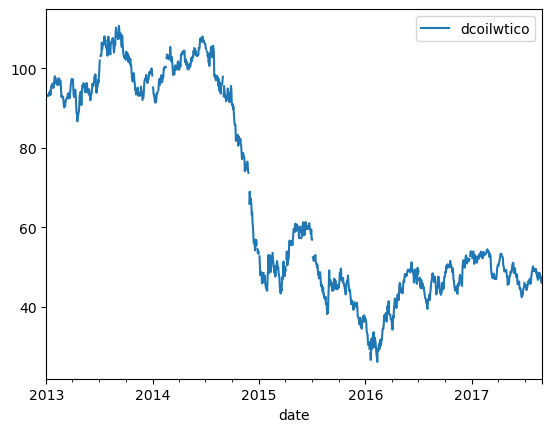

In [108]:
# original plot
oil.plot();
oil.mean().round(2)

In [109]:
oil.ffill()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
...,...
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46


dcoilwtico    67.67
dtype: float64

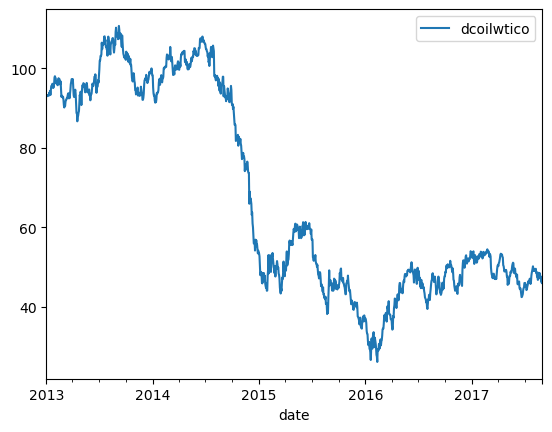

In [110]:
oil.ffill().plot();
oil.ffill().mean().round(2)

In [111]:
oil.bfill()


,dcoilwtico
date,
2013-01-01,93.14
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
...,...
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46


dcoilwtico    67.67
dtype: float64

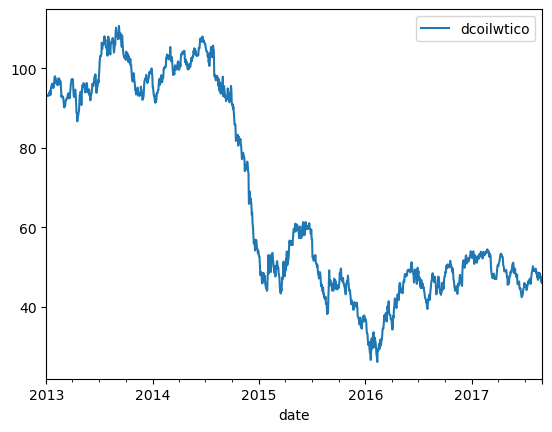

In [112]:
oil.bfill().plot();
oil.bfill().mean().round(2)

In [113]:
type(oil.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [114]:
oil.index.dtype

dtype('<M8[ns]')

In [115]:
import numpy as np

In [116]:
oil.info( show_counts = 1)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1175 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


dcoilwtico    67.66
dtype: float64

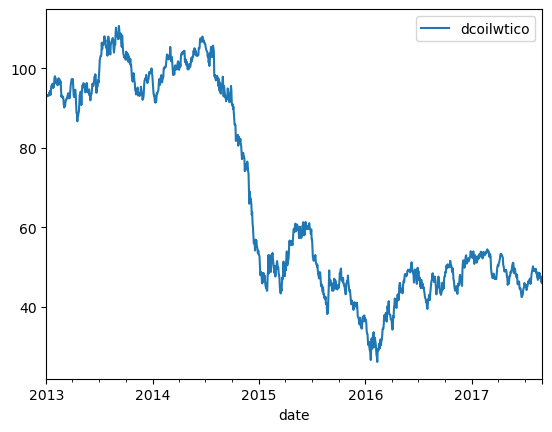

In [117]:
oil.interpolate().plot()
oil.interpolate().mean().round(2)

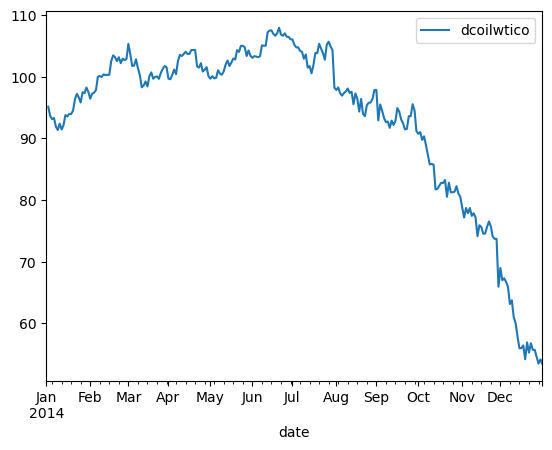

In [118]:
oil.loc["2014"].ffill().plot();

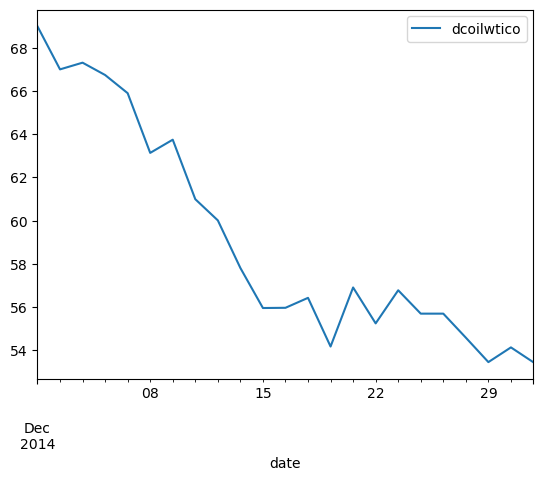

In [119]:
oil.loc["2014-12"].ffill().plot();

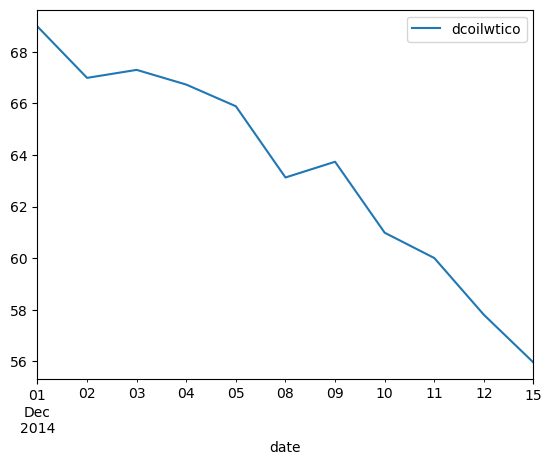

In [120]:
oil.loc["2014-12-01" : "2014-12-15"].ffill().plot();

# Assignment 4: Shift and Diff

Hello,
I’m looking into a few different year over year trends related to changes made at store 47.

Can you plot the sum of monthly of transactions in year 2015 vs the sum of monthly transactions in the year prior for store 47?

Make sure to group your DataFrame by year AND month!

Thanks

In [121]:
transaction.columns

Index(['date', 'store_nbr', 'transactions', 'year', 'month', 'day_of_week',
       'time_to_last_date', 'weeks_to_last_date'],
      dtype='object')

In [122]:
transaction.set_index(transaction["date"])
transaction

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date,weeks_to_last_date
0,2013-01-01,25,770,2013,1,1,1687 days,241.000000
1,2013-01-02,1,2111,2013,1,2,1686 days,240.857143
2,2013-01-02,2,2358,2013,1,2,1686 days,240.857143
3,2013-01-02,3,3487,2013,1,2,1686 days,240.857143
4,2013-01-02,4,1922,2013,1,2,1686 days,240.857143
...,...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,2017,8,1,0 days,0.000000
83484,2017-08-15,51,1573,2017,8,1,0 days,0.000000
83485,2017-08-15,52,2255,2017,8,1,0 days,0.000000
83486,2017-08-15,53,932,2017,8,1,0 days,0.000000


In [123]:
#transaction = transaction.set_index("date")
transaction

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date,weeks_to_last_date
0,2013-01-01,25,770,2013,1,1,1687 days,241.000000
1,2013-01-02,1,2111,2013,1,2,1686 days,240.857143
2,2013-01-02,2,2358,2013,1,2,1686 days,240.857143
3,2013-01-02,3,3487,2013,1,2,1686 days,240.857143
4,2013-01-02,4,1922,2013,1,2,1686 days,240.857143
...,...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,2017,8,1,0 days,0.000000
83484,2017-08-15,51,1573,2017,8,1,0 days,0.000000
83485,2017-08-15,52,2255,2017,8,1,0 days,0.000000
83486,2017-08-15,53,932,2017,8,1,0 days,0.000000


In [124]:
transaction.head()

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date,weeks_to_last_date
0,2013-01-01,25,770,2013,1,1,1687 days,241.000000
1,2013-01-02,1,2111,2013,1,2,1686 days,240.857143
2,2013-01-02,2,2358,2013,1,2,1686 days,240.857143
3,2013-01-02,3,3487,2013,1,2,1686 days,240.857143
4,2013-01-02,4,1922,2013,1,2,1686 days,240.857143


In [161]:
# (transaction.loc[transaction["store_nbr"] == 47]
#  .loc["2015-01-01":"2015-12-31"]
#  .groupby(["store_nbr" , "date" , "month"]).agg({"transactions" : "sum"})
# )

,,,transactions
store_nbr,date,month,


<Axes: xlabel='year,month'>

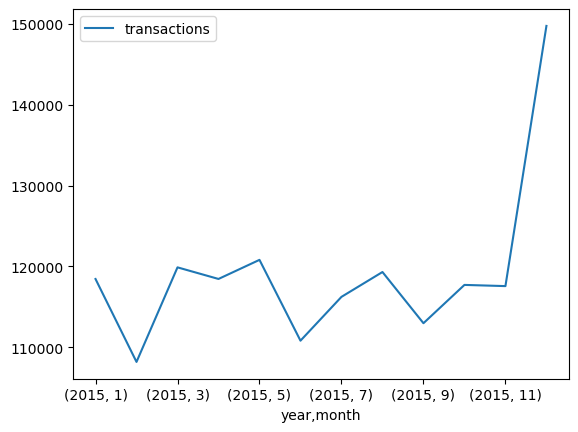

In [176]:
(transaction.loc[transaction["store_nbr"] == 47]
 .loc[transaction.date.dt.year == 2015]
 .groupby(["year" ,"month"]).agg({"transactions": "sum"})
 .plot()
)

In [181]:
(transaction.loc[transaction["store_nbr"] == 47]
 .loc[transaction.date.dt.year == [2014,2015]]
 .groupby(["month"]).agg({"transactions": "sum"})
 .plot()
)

ValueError: ('Lengths must match to compare', (83488,), (2,))

### Solution
transaction47 = transaction.loc[transaction["store_nbr"] == 47 , ["store_nbr" , "date" , "transactions"]]
transaction47

In [203]:
transaction47 = transaction.loc[transaction["store_nbr"] == 47 ,
                                ["store_nbr" , "date" , "transactions"]
                               ]
transaction47

,store_nbr,date,transactions
41,47,2013-01-02,4161
87,47,2013-01-03,3660
133,47,2013-01-04,3915
179,47,2013-01-05,4764
225,47,2013-01-06,4935
...,...,...,...
83264,47,2017-08-11,4009
83318,47,2017-08-12,3825
83372,47,2017-08-13,3741
83426,47,2017-08-14,3606


In [196]:
transaction47.columns

Index(['transactions'], dtype='object')

In [221]:
transaction47_48 = (transaction.groupby(["store_nbr" , transaction["date"].dt.year , transaction["date"].dt.month])
 .agg({"transactions" : "sum"})
 .loc[47:48]
)
transaction47_48

transactions
store_nbr date date              
47        2013 1           109668
               2           103706
               3           116873
               4           108571
               5           113532
...                           ...
48        2017 4            90956
               5            90895
               6            84719
               7            92661
               8            45595

[112 rows x 1 columns]

In [228]:
transaction47_new = (transaction.groupby(["store_nbr" , transaction["date"].dt.year , transaction["date"].dt.month])
 .agg({"transactions" : "sum"})
 .loc[47]
)
transaction47_new

transactions
date date              
2013 1           109668
     2           103706
     3           116873
     4           108571
     5           113532
     6           110637
     7           107506
     8           112001
     9           114468
     10          114585
     11          114436
     12          150204
2014 1           114190
     2           107175
     3           121771
     4           122976
     5           126298
     6           118398
     7           118522
     8           121949
     9           115552
     10          116741
     11          116996
     12          147371
2015 1           118445
     2           108186
     3           119883
     4           118449
     5           120810
     6           110814
     7           116234
     8           119307
     9           112975
     10          117712
     11          117564
     12          149747
2016 1           108521
     2           111132
     3           116599
     4           117046
     5           115799
     6           108539
     7           114724
     8           114185
     9           112026
     10          116242
     11          118587
     12          149367
2017 1           118000
     2           109254
     3           119122
     4           119174
     5           120941
     6           114171
     7           120588
     8            57541

In [229]:
transaction47_new["year_prior"] = transaction47_new["transactions"].shift(12)
transaction47_new

transactions  year_prior
date date                          
2013 1           109668         NaN
     2           103706         NaN
     3           116873         NaN
     4           108571         NaN
     5           113532         NaN
     6           110637         NaN
     7           107506         NaN
     8           112001         NaN
     9           114468         NaN
     10          114585         NaN
     11          114436         NaN
     12          150204         NaN
2014 1           114190    109668.0
     2           107175    103706.0
     3           121771    116873.0
     4           122976    108571.0
     5           126298    113532.0
     6           118398    110637.0
     7           118522    107506.0
     8           121949    112001.0
     9           115552    114468.0
     10          116741    114585.0
     11          116996    114436.0
     12          147371    150204.0
2015 1           118445    114190.0
     2           108186    107175.0
     3           119883    121771.0
     4           118449    122976.0
     5           120810    126298.0
     6           110814    118398.0
     7           116234    118522.0
     8           119307    121949.0
     9           112975    115552.0
     10          117712    116741.0
     11          117564    116996.0
     12          149747    147371.0
2016 1           108521    118445.0
     2           111132    108186.0
     3           116599    119883.0
     4           117046    118449.0
     5           115799    120810.0
     6           108539    110814.0
     7           114724    116234.0
     8           114185    119307.0
     9           112026    112975.0
     10          116242    117712.0
     11          118587    117564.0
     12          149367    149747.0
2017 1           118000    108521.0
     2           109254    111132.0
     3           119122    116599.0
     4           119174    117046.0
     5           120941    115799.0
     6           114171    108539.0
     7           120588    114724.0
     8            57541    114185.0

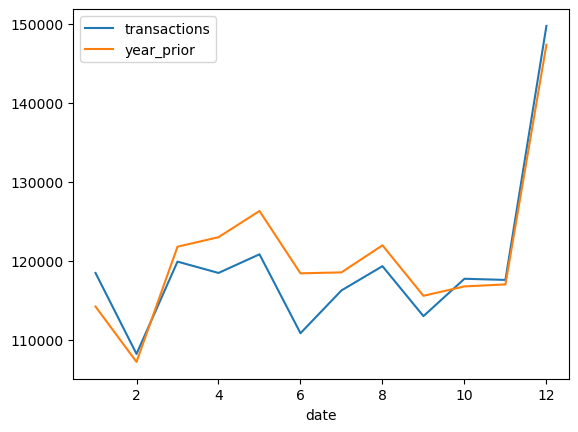

In [233]:
transaction47_new.loc[2015].plot();

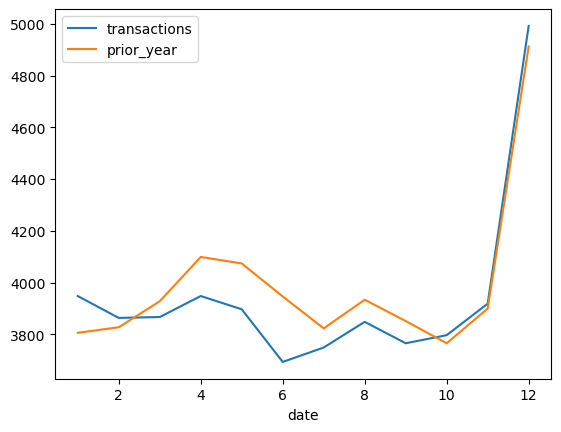

In [239]:
transaction47_mean = (transaction.groupby(["store_nbr" , transaction["date"].dt.year , transaction["date"].dt.month])
 .agg({"transactions" : "mean"}).round(2)
 .loc[47]
)
transaction47_mean["prior_year"] = transaction47_mean["transactions"].shift(12)
transaction47_mean.loc[2015].plot();

# Assignment 5: Resampling Time Series

Plot the monthly and yearly average oil prices.

In [240]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


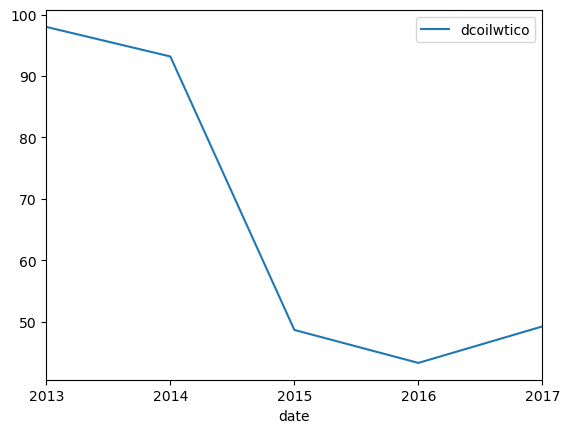

In [245]:
oil.resample("Y").mean().round(2).plot();

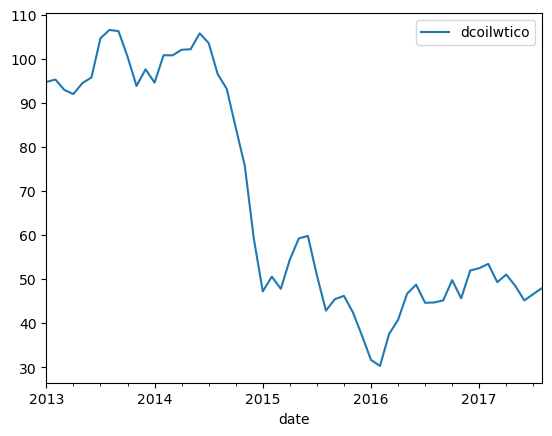

In [247]:
oil.resample("M").mean().round(2).plot();

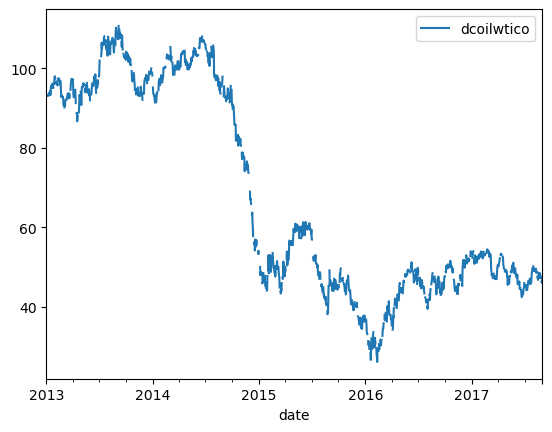

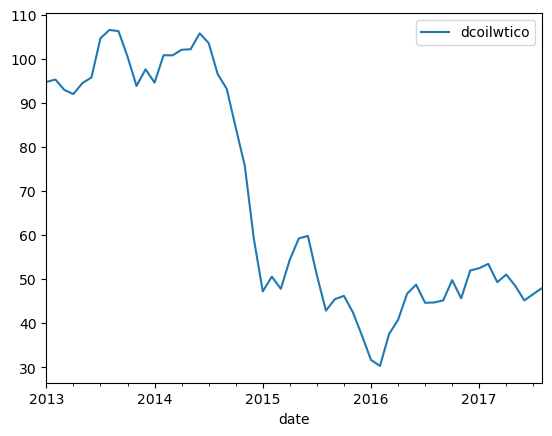

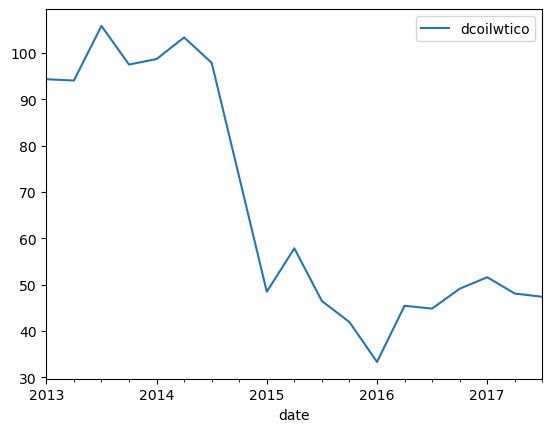

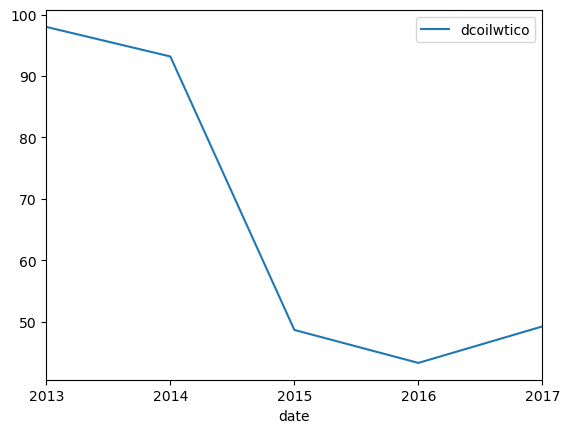

In [248]:
for day in ["D" , "M" , "Q" , "A"]:
    oil.resample(day).mean().round(2).plot();

In [ ]:
oil.head()

In [246]:
oil.loc["2013-01-01":"2013-01-31"]

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
2013-01-08,93.21
2013-01-09,93.08
2013-01-10,93.81
2013-01-11,93.60


In [250]:
# recreate transactions_47 with date as index 

transactions_47 = (transaction
                   .loc[transaction["store_nbr"]==47, ["date", "transactions"]]
                   .set_index("date"))

transactions_47.head()

,transactions
date,
2013-01-02,4161
2013-01-03,3660
2013-01-04,3915
2013-01-05,4764
2013-01-06,4935


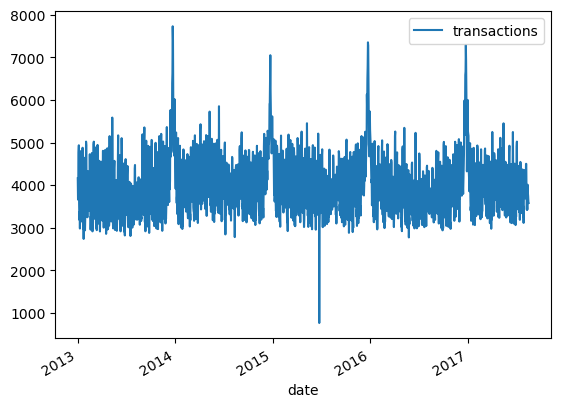

In [252]:
# original daily series for comparison

transactions_47.plot();

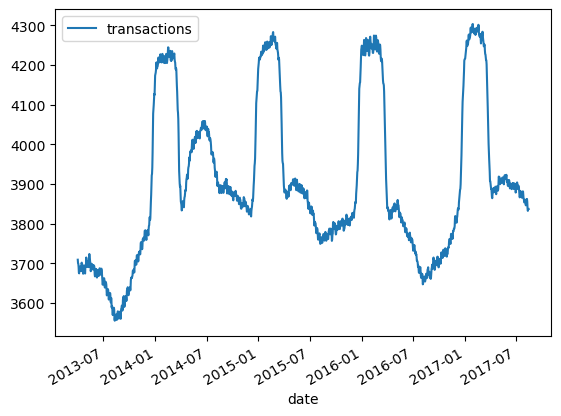

In [253]:
transactions_47.rolling(90).mean().plot();